In [21]:
#import requried library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import re
import math 
from sklearn import linear_model
#loading data
datas = pd.read_csv("turboaz.csv")
interest = datas[["Yurush","Buraxilish ili","Qiymet"]]

interest

,Yurush,Buraxilish ili,Qiymet
0,366 000 km,1999,12500 AZN
1,102 000 km,2014,31500 $
2,469 700 km,2002,11700 AZN
3,556 680 km,1998,9700 AZN
4,300 000 km,2000,12700 AZN
...,...,...,...
1323,325 000 km,1996,8800 AZN
1324,280 000 km,1994,6300 AZN
1325,272 000 km,1998,10900 AZN
1326,207 000 km,2000,11300 AZN


In [22]:
#cleaning data
idx = 0
for obj in interest['Yurush']:
    obj = re.sub("[^0-9]", "", obj)
    interest.iat[idx, 0] = int(obj)
    idx += 1

idx = 0;
for obj in interest['Qiymet']:
    obj = re.sub("[^0-9]", "", obj)
    interest.iat[idx, 2] = int(obj)
    idx += 1
interest["Yurush"] = interest["Yurush"].astype(np.int32)
interest["Qiymet"] = interest["Qiymet"].astype(np.int32)
interest

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500
1,102000,2014,31500
2,469700,2002,11700
3,556680,1998,9700
4,300000,2000,12700
...,...,...,...
1323,325000,1996,8800
1324,280000,1994,6300
1325,272000,1998,10900
1326,207000,2000,11300


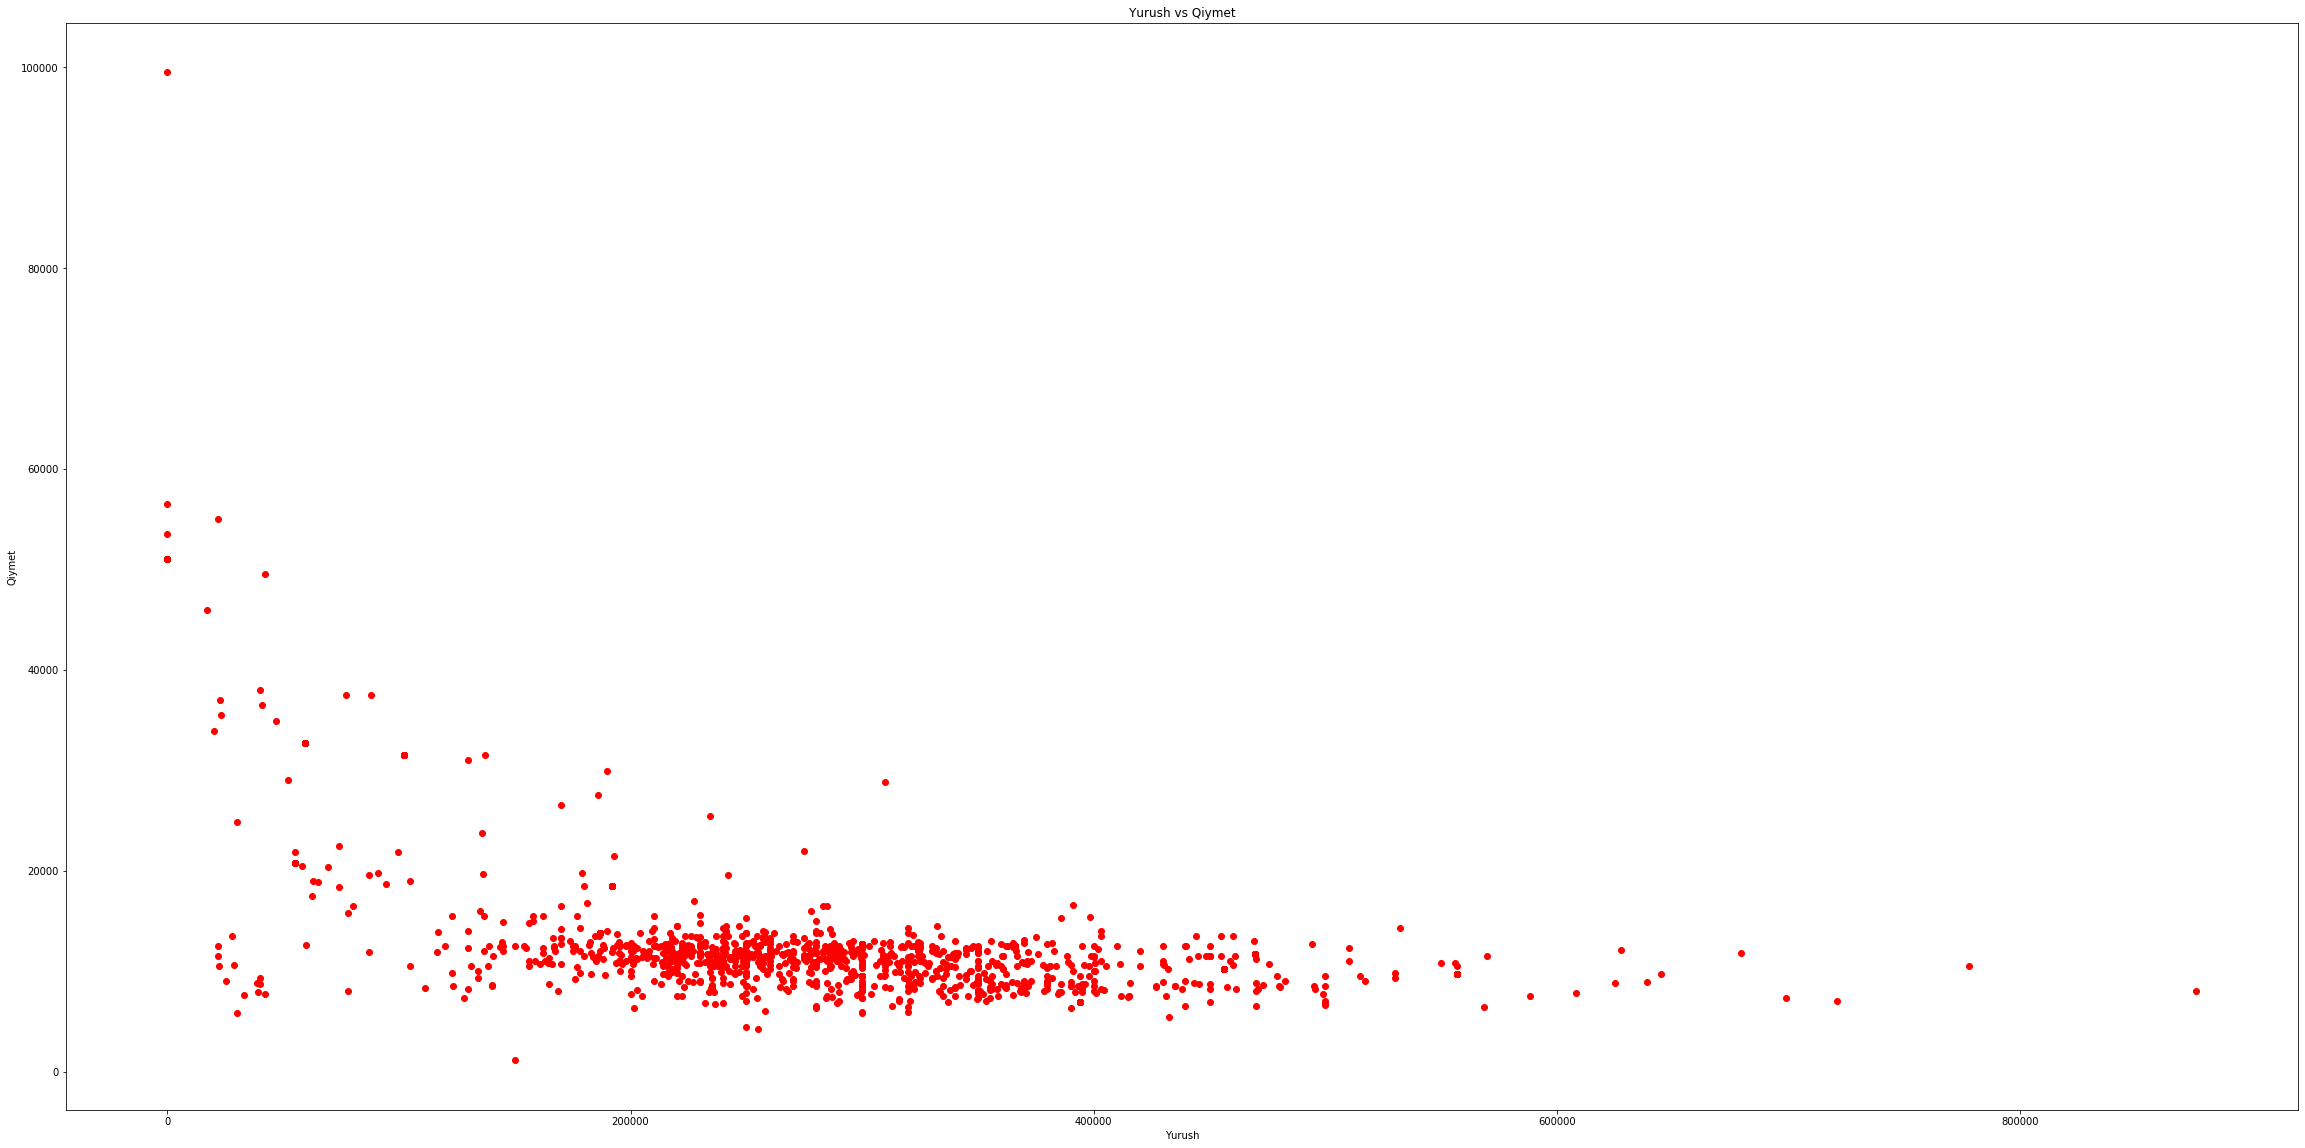

In [23]:
#Visualization part 1.1

plt.figure(figsize = (40, 20))
plt.scatter(y = interest["Qiymet"], x = interest["Yurush"], c = 'red', marker = 'o')
plt.xlabel("Yurush")
plt.ylabel("Qiymet")
plt.title("Yurush vs Qiymet")
plt.show()

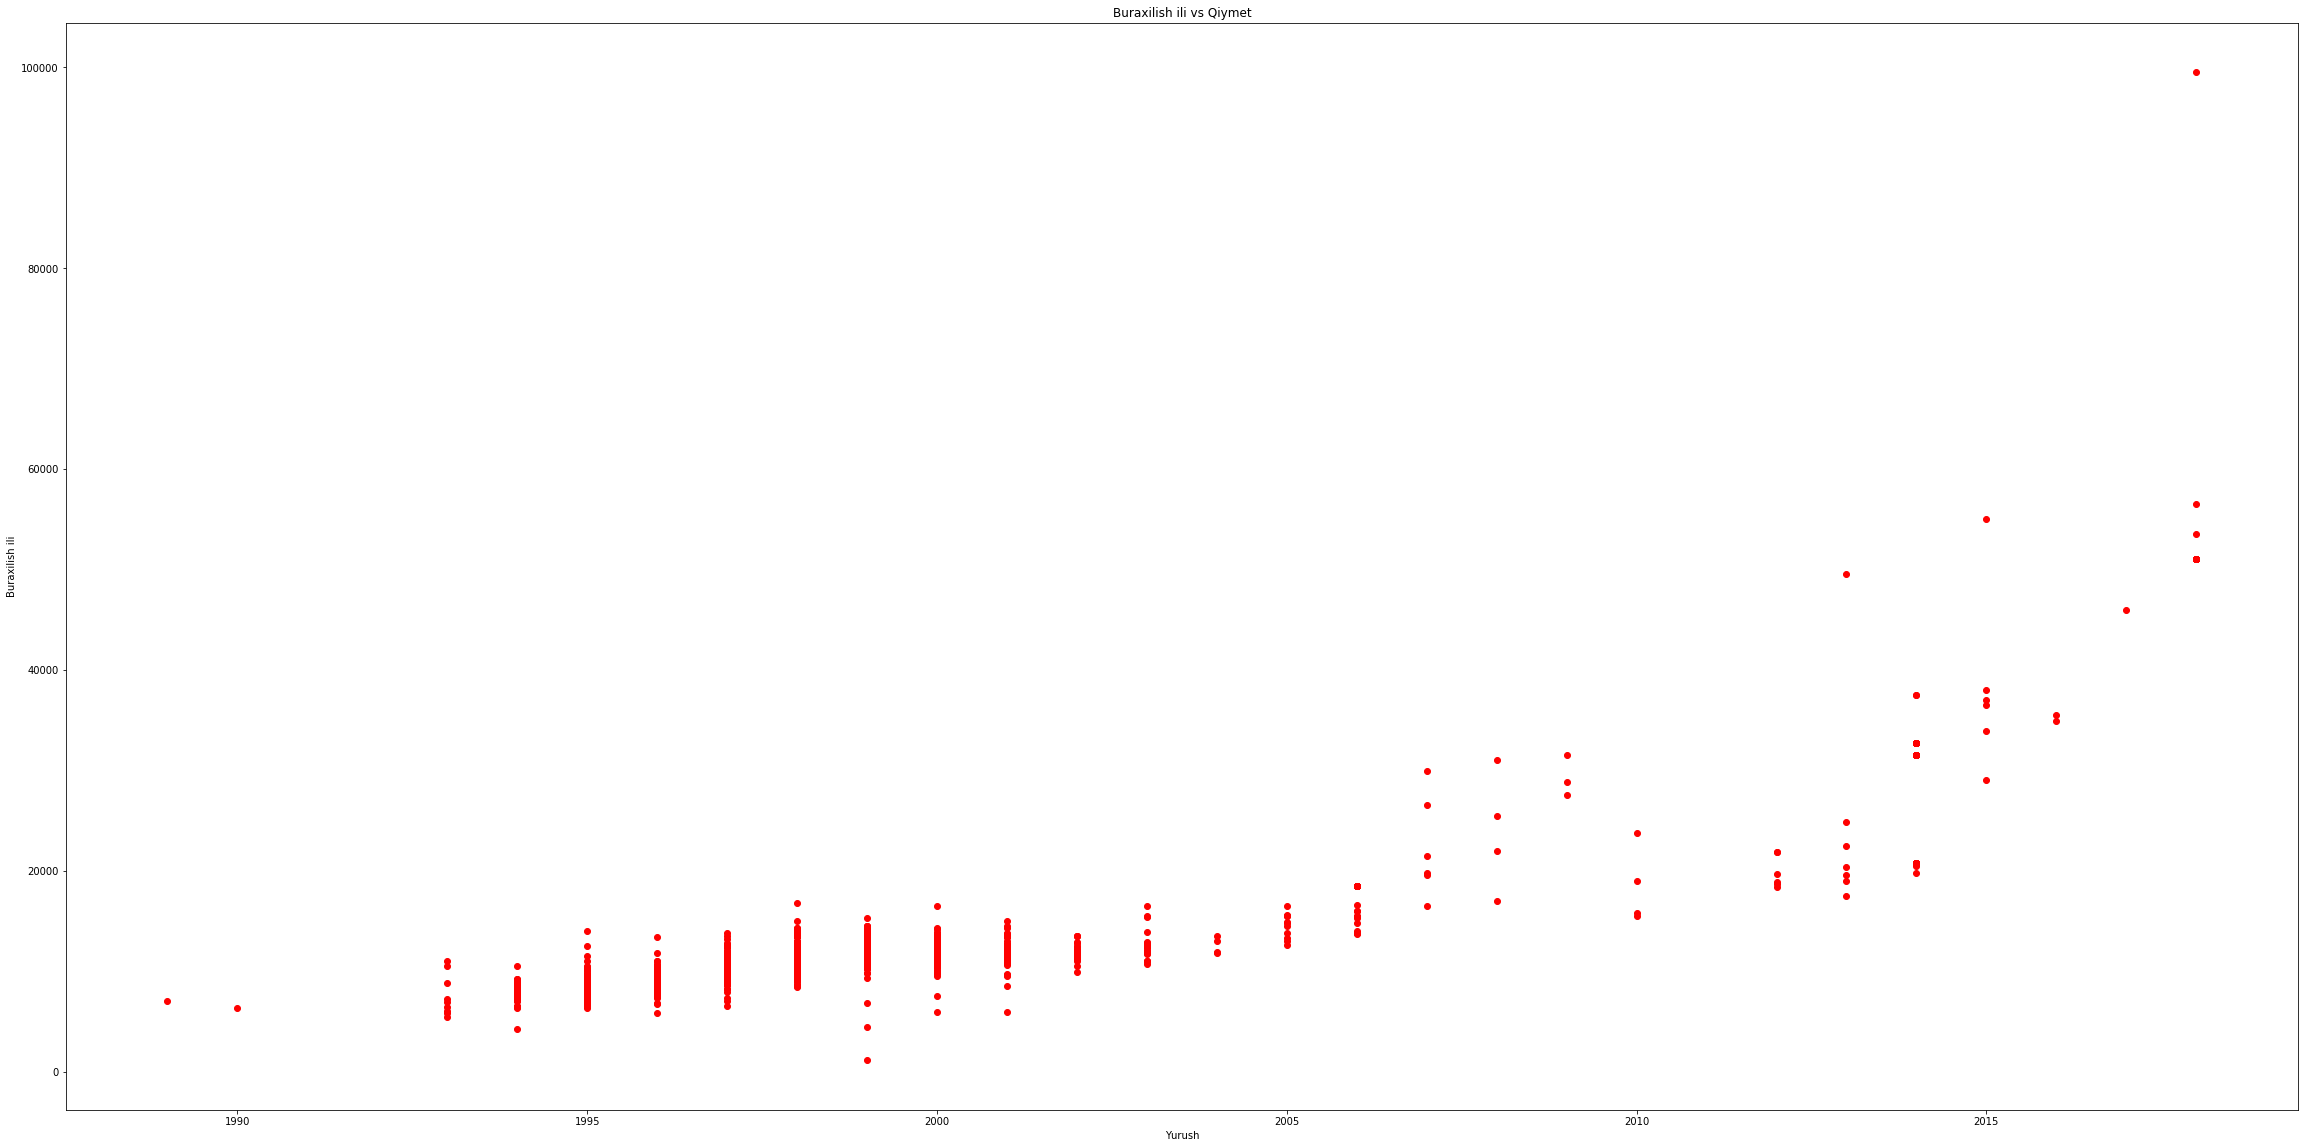

In [24]:
#Visualisation part 1.2
plt.figure(figsize=(40, 20))
plt.scatter(y=interest["Qiymet"], x=interest["Buraxilish ili"], c='red', marker='o')
plt.xlabel("Yurush")
plt.ylabel("Buraxilish ili")
plt.title("Buraxilish ili vs Qiymet")
plt.show()

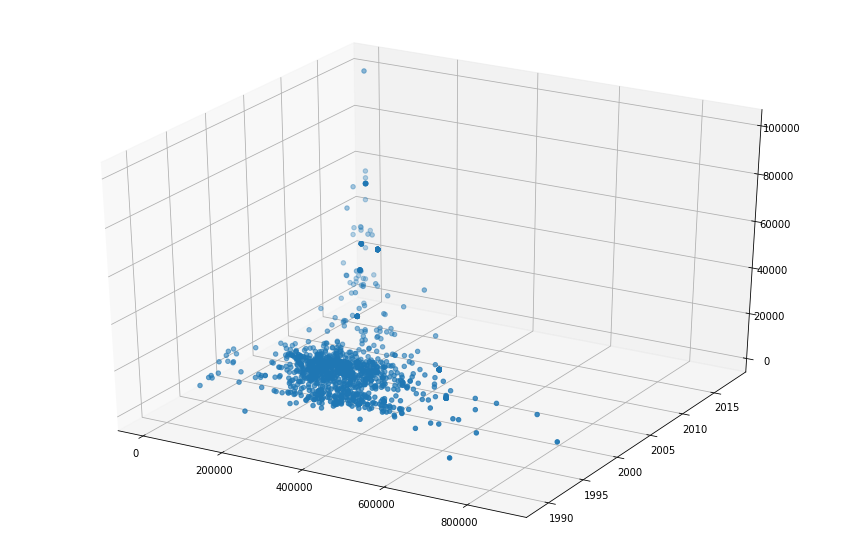

In [25]:
#Visualisation part 1.3

fig = plt.figure(figsize = (15, 10)) 
ax = plt.axes(projection ="3d") 
x = interest['Yurush']
y = interest['Buraxilish ili']
z = interest['Qiymet']
# Creating plot 
ax.scatter3D(x, y, z); 
# show plot 
plt.show() 

In [26]:
#Cost function

def cost(x, y, t):
    h=np.matmul(np.array(x), np.array(t))
    c=(1/(2*len(y))) * np.sum(np.power((h-y), 2))
    return c

In [27]:
#Gradient descent


def gradientDescent(x, y, alpha, numOfIterations):
    y = y.values
    x = x.values
    #Normalization of data (x - mean(x)/ std(x))
    std = x.std(axis=0)  
    mean = x.mean(axis=0)
    x = (x - x.mean(axis = 0))/ x.std(axis =0) 
    x = np.append(x, np.ones((len(datas),1)), axis=1)
    theta = np.random.random(x.shape[1])
    allCosts = []
    for i in range(numOfIterations):
        h = np.matmul(x, theta)
        error = h - y
        allCosts.append(cost(x, y, theta))
        theta = theta - alpha * (np.matmul(x.transpose(), error) / len(y))
    return theta, allCosts, std, mean

In [28]:
alpha = 0.001
numOfIterations = 10000

theta, allCosts, std, mean = gradientDescent(x=interest[['Yurush', 'Buraxilish ili']], y=interest['Qiymet'], alpha = 0.001, numOfIterations = 10000)

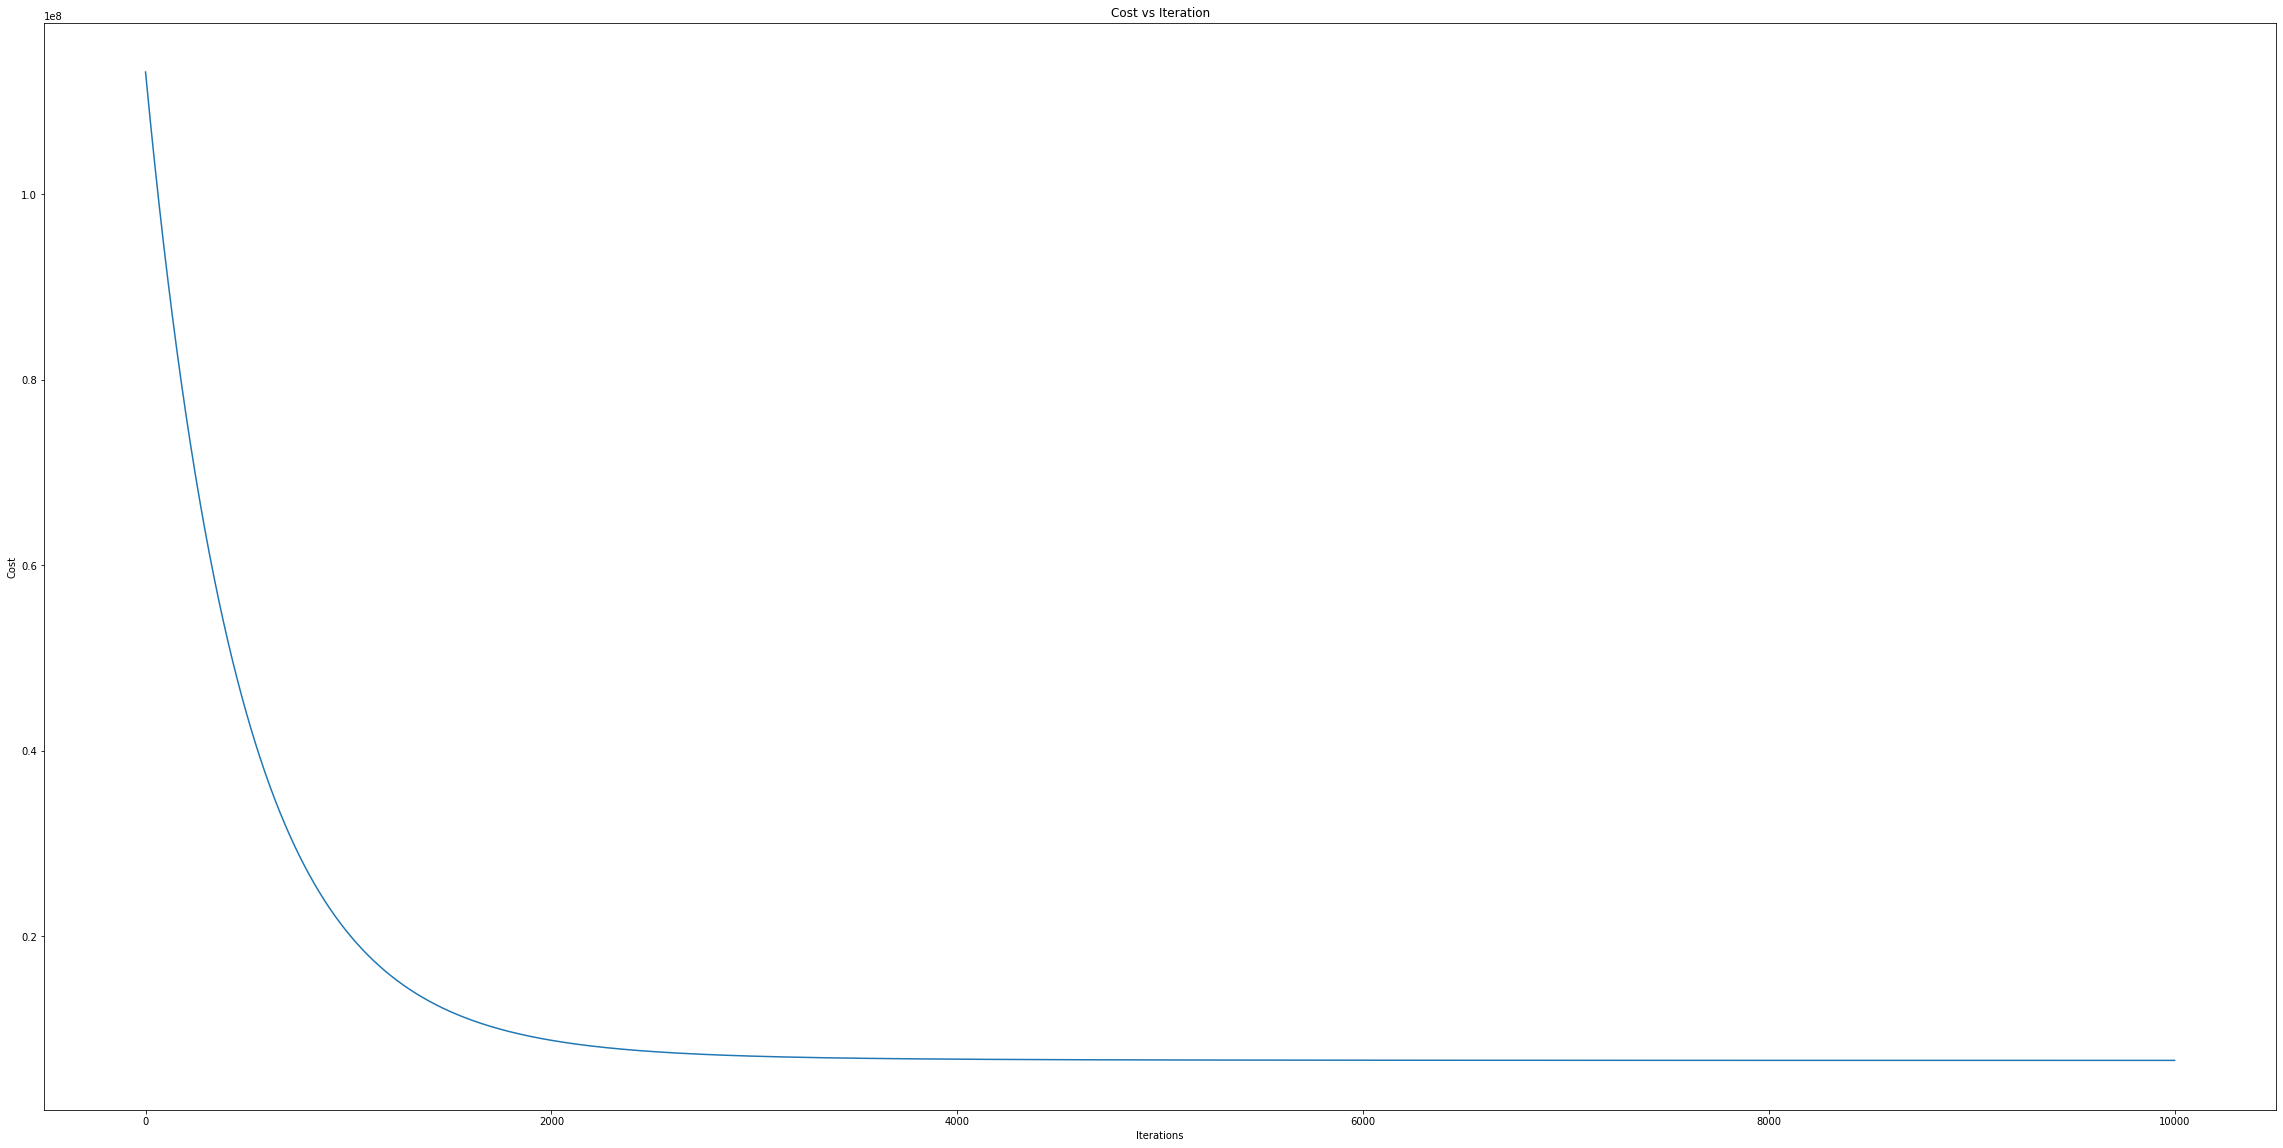

In [35]:
#Visualisation part 2.1
plt.figure(figsize = (40, 20))
plt.plot(np.arange(0, len(allCosts)), allCosts)
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

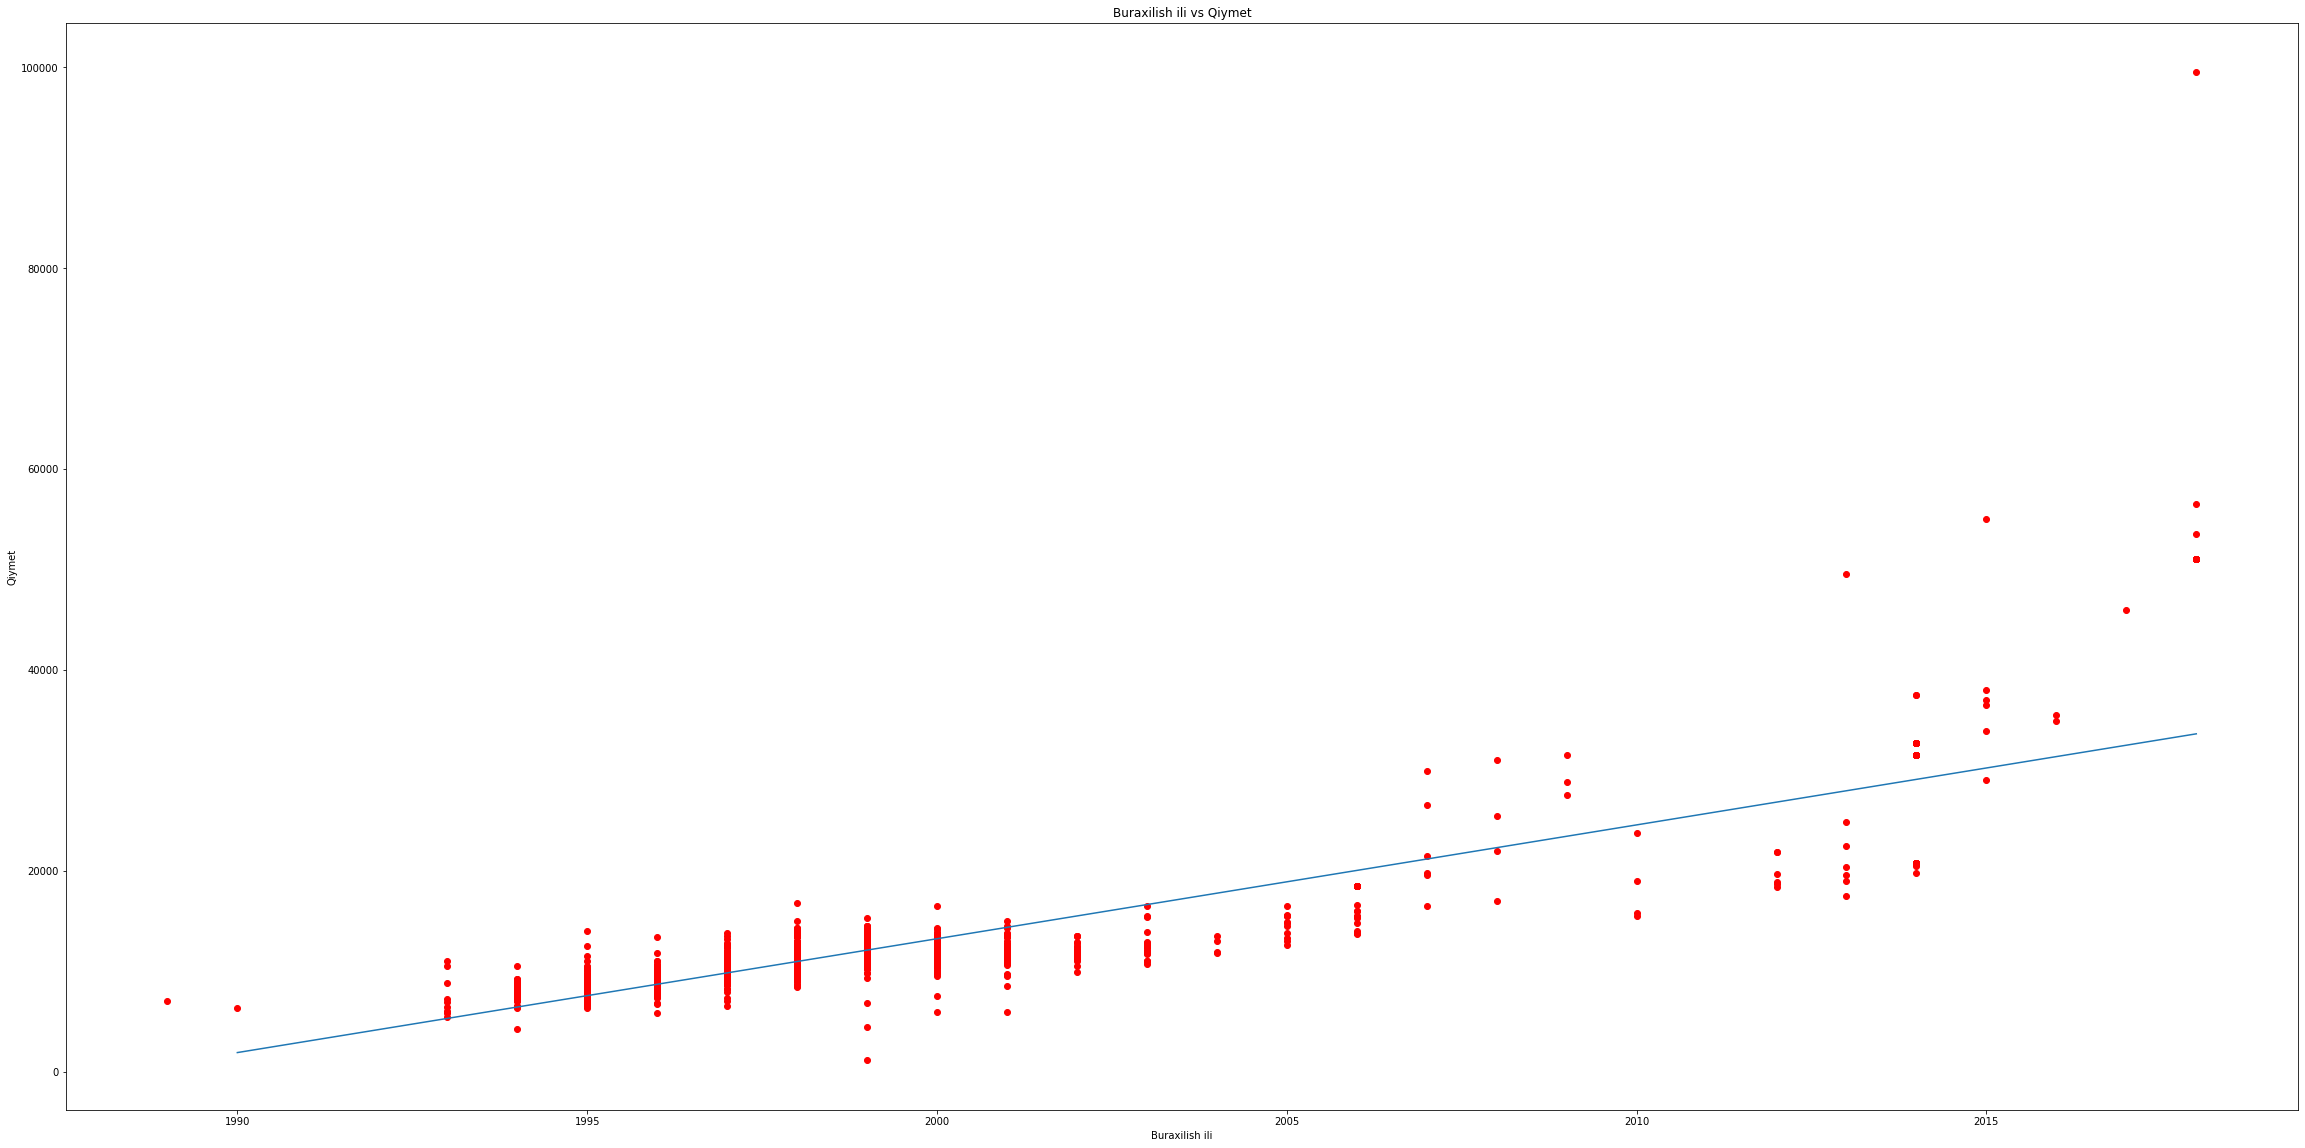

In [36]:
#Visualisation part 2.2
plt.figure(figsize = (40, 20))
plt.scatter(x=interest["Buraxilish ili"], y=interest["Qiymet"], c = 'red')
x = [1990, 2018]
y = [theta[2] + (1990-mean[1])/std[1]*theta[1], theta[2] + (2018-mean[1])/std[1]*theta[1]]
plt.plot(x, y)
plt.xlabel("Buraxilish ili")
plt.ylabel("Qiymet")
plt.title('Buraxilish ili vs Qiymet')
plt.show()

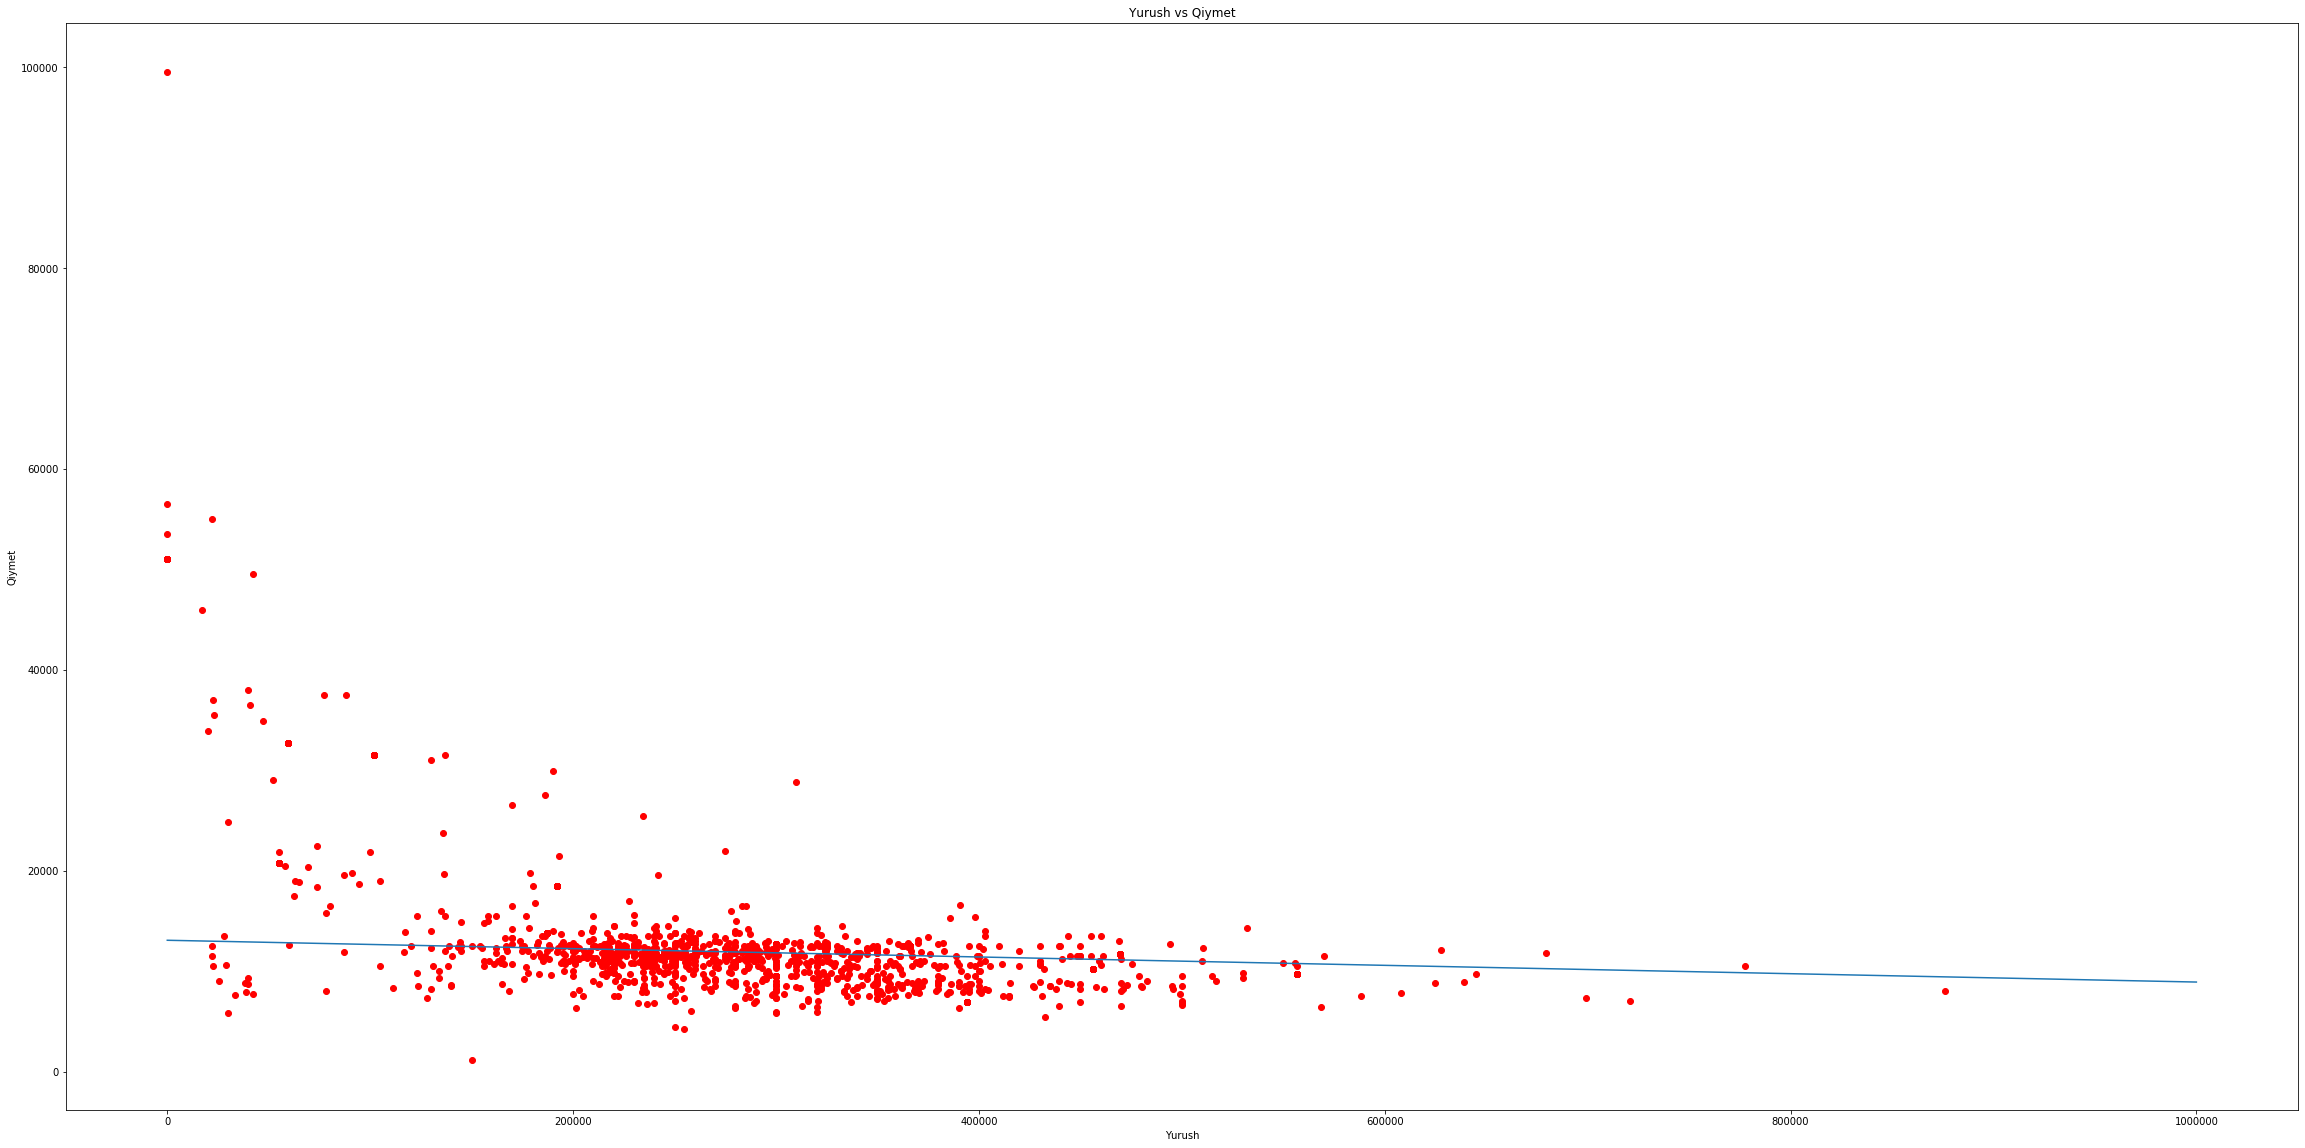

In [37]:
#Visualisation part 2.3
plt.figure(figsize = (40, 20))
plt.scatter(x=interest["Yurush"], y=interest["Qiymet"], c = 'red')
x = [0, 1000000]
y = [theta[2], theta[2] + (1000000-mean[0])/std[0]*theta[0]]
plt.plot(x, y)
plt.xlabel("Yurush")
plt.ylabel("Qiymet")
plt.title('Yurush vs Qiymet')
plt.show()

<Figure size 2880x1440 with 0 Axes>

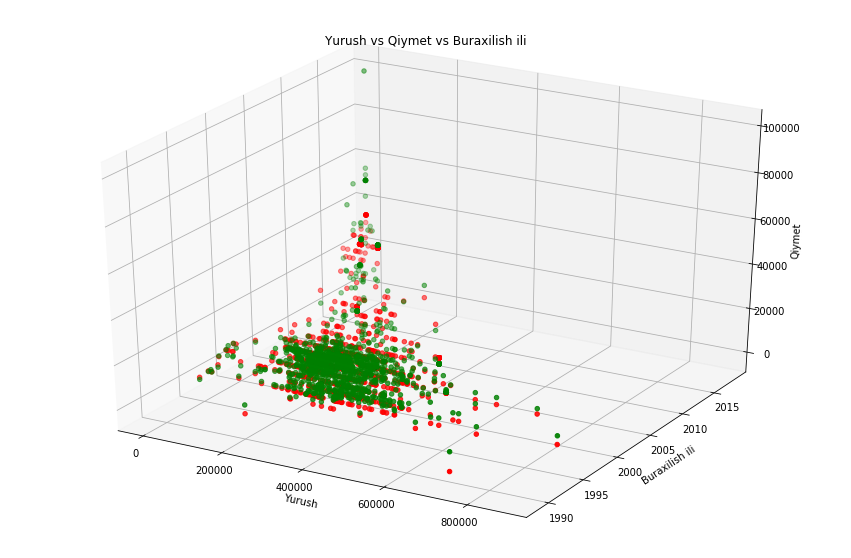

In [38]:
plt.figure(figsize=(40, 20))
arrayNew = interest[["Yurush", "Buraxilish ili"]].values
arrayNew = (arrayNew-mean)/std
array = np.ones((arrayNew.shape[0],1))
arrayNew = np.append(arrayNew, array, axis=1)
h = np.matmul(arrayNew, theta) 
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d") 
ax.scatter(interest["Yurush"], interest["Buraxilish ili"], interest["Qiymet"], c="green")
ax.scatter(interest["Yurush"], interest["Buraxilish ili"], h, c="red")
ax.set_xlabel('Yurush')
ax.set_ylabel('Buraxilish ili')
ax.set_zlabel('Qiymet')

plt.title('Yurush vs Qiymet vs Buraxilish ili')
plt.show()

In [39]:
value=np.array([11500, 8800])
testing=np.array([[240000, 2000],[415558, 1996]])
#Normalizing of test
testing = (testing-mean)/std 
array = np.ones((len(testing),1))
testing = np.append(testing, array, axis=1)

value = np.array([11500, 8800])
h = np.matmul(testing, theta)
close = h - value

print("Car 1:", 
          h[0],"Difference with Actual:", close[0])

print("Car 2:", 
          h[1],"Difference with Actual:", close[1])

Car 1: 13465.798000526705 Difference with Actual: 1965.7980005267054
Car 2: 7920.197793022713 Difference with Actual: -879.8022069772869


In [41]:
reg = linear_model.LinearRegression()
reg.fit(interest[['Yurush', 'Buraxilish ili']], interest[['Qiymet']])
array = np.array([11500, 8800])
value =[[240000, 2000],[415558, 1996]]
h = reg.predict(value)
close = h - array
print("Car 1:", h[0], " Difference with y:", close[0][1])

print("Car 2:", h[1], "  Difference with y:", close[1][1])

Car 1: [13455.18511368]  Difference with y: 4655.185113677289
Car 2: [7935.60165749]   Difference with y: -864.39834250696
